# Clustering para  Pokemon

# 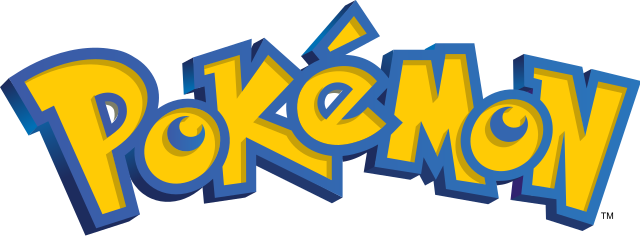

# Carga de modulos y datos

In [1]:
# Data Wrangling

import pandas as pd
import numpy as np
import matplotlib 

# Data Visualization
import cufflinks as cf

# Data preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# Modeling
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score, silhouette_samples

# Environment setup
cf.go_offline()

In [2]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving archivo_final.csv to archivo_final.csv


In [3]:
df = pd.read_csv("archivo_final.csv")

In [4]:
del df["release_date"]

In [5]:
df.columns


Index(['idNum', 'name', 'HP', 'speed', 'attack', 'special_attack', 'defense',
       'special_defense', 'experience_growth', 'capture_rate',
       ...
       'ab_shadowshield', 'ab_beastboost', 'game_pocketmonsters:red and green',
       'game_pokemonblack and white', 'game_pokemondiamond and pearl',
       'game_pokemongold and silver', 'game_pokemonruby and sapphire',
       'game_pokemonsun and moon', 'game_pokemonx and y', 'generation'],
      dtype='object', length=259)

In [6]:
columns_names = {}
list(df.columns.values)

['idNum',
 'name',
 'HP',
 'speed',
 'attack',
 'special_attack',
 'defense',
 'special_defense',
 'experience_growth',
 'capture_rate',
 'is_legendary',
 'type_bug',
 'type_dark',
 'type_dragon',
 'type_electric',
 'type_fairy',
 'type_fighting',
 'type_fire',
 'type_flying',
 'type_ghost',
 'type_grass',
 'type_ground',
 'type_ice',
 'type_normal',
 'type_poison',
 'type_psychic',
 'type_rock',
 'type_steel',
 'type_water',
 'ab_overgrow',
 'ab_chlorophyll',
 'ab_blaze',
 'ab_solarpower',
 'ab_torrent',
 'ab_raindish',
 'ab_shielddust',
 'ab_runaway',
 'ab_shedskin',
 'ab_compoundeyes',
 'ab_tintedlens',
 'ab_swarm',
 'ab_sniper',
 'ab_keeneye',
 'ab_tangledfeet',
 'ab_bigpecks',
 'ab_guts',
 'ab_hustle',
 'ab_gluttony',
 'ab_thickfat',
 'ab_intimidate',
 'ab_unnerve',
 'ab_static',
 'ab_lightningrod',
 'ab_surgesurfer',
 'ab_sandveil',
 'ab_sandrush',
 'ab_snowcloak',
 'ab_slushrush',
 'ab_poisonpoint',
 'ab_rivalry',
 'ab_sheerforce',
 'ab_cutecharm',
 'ab_magicguard',
 'ab_friendg

In [7]:
columns_names =list(df.columns.values)

In [8]:
columns_names

['idNum',
 'name',
 'HP',
 'speed',
 'attack',
 'special_attack',
 'defense',
 'special_defense',
 'experience_growth',
 'capture_rate',
 'is_legendary',
 'type_bug',
 'type_dark',
 'type_dragon',
 'type_electric',
 'type_fairy',
 'type_fighting',
 'type_fire',
 'type_flying',
 'type_ghost',
 'type_grass',
 'type_ground',
 'type_ice',
 'type_normal',
 'type_poison',
 'type_psychic',
 'type_rock',
 'type_steel',
 'type_water',
 'ab_overgrow',
 'ab_chlorophyll',
 'ab_blaze',
 'ab_solarpower',
 'ab_torrent',
 'ab_raindish',
 'ab_shielddust',
 'ab_runaway',
 'ab_shedskin',
 'ab_compoundeyes',
 'ab_tintedlens',
 'ab_swarm',
 'ab_sniper',
 'ab_keeneye',
 'ab_tangledfeet',
 'ab_bigpecks',
 'ab_guts',
 'ab_hustle',
 'ab_gluttony',
 'ab_thickfat',
 'ab_intimidate',
 'ab_unnerve',
 'ab_static',
 'ab_lightningrod',
 'ab_surgesurfer',
 'ab_sandveil',
 'ab_sandrush',
 'ab_snowcloak',
 'ab_slushrush',
 'ab_poisonpoint',
 'ab_rivalry',
 'ab_sheerforce',
 'ab_cutecharm',
 'ab_magicguard',
 'ab_friendg

In [9]:
Ni=['idNum','name','is_legendary',"generation"]

In [10]:
df.dtypes
df['capture_rate']= df['capture_rate'].replace(['30 (Meteorite)255 (Core)'],['30'])

In [11]:
aux=[x for x in columns_names if x not in Ni]
aux
df_aux=pd.DataFrame(df[aux])
df_aux

,HP,speed,attack,special_attack,defense,special_defense,experience_growth,capture_rate,type_bug,type_dark,...,ab_fullmetalbody,ab_shadowshield,ab_beastboost,game_pocketmonsters:red and green,game_pokemonblack and white,game_pokemondiamond and pearl,game_pokemongold and silver,game_pokemonruby and sapphire,game_pokemonsun and moon,game_pokemonx and y
0,45,45,49,65,49,65,1059860,45,0,0,...,0,0,0,1,0,0,0,0,0,0
1,60,60,62,80,63,80,1059860,45,0,0,...,0,0,0,1,0,0,0,0,0,0
2,80,80,100,122,123,120,1059860,45,0,0,...,0,0,0,1,0,0,0,0,0,0
3,39,65,52,60,43,50,1059860,45,0,0,...,0,0,0,1,0,0,0,0,0,0
4,58,80,64,80,58,65,1059860,45,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,43,37,29,29,31,31,1250000,45,0,0,...,0,0,0,0,0,0,0,0,1,0
753,43,37,29,29,131,131,1250000,45,0,0,...,0,0,0,0,0,0,0,0,1,0
754,137,97,137,113,107,89,1250000,45,0,0,...,1,0,0,0,0,0,0,0,1,0
755,137,97,113,137,89,107,1250000,45,0,0,...,0,1,0,0,0,0,0,0,1,0


In [12]:
df_aux.astype('float', errors='ignore')

,HP,speed,attack,special_attack,defense,special_defense,experience_growth,capture_rate,type_bug,type_dark,...,ab_fullmetalbody,ab_shadowshield,ab_beastboost,game_pocketmonsters:red and green,game_pokemonblack and white,game_pokemondiamond and pearl,game_pokemongold and silver,game_pokemonruby and sapphire,game_pokemonsun and moon,game_pokemonx and y
0,45.0,45.0,49.0,65.0,49.0,65.0,1059860.0,45.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,60.0,60.0,62.0,80.0,63.0,80.0,1059860.0,45.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,80.0,80.0,100.0,122.0,123.0,120.0,1059860.0,45.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,39.0,65.0,52.0,60.0,43.0,50.0,1059860.0,45.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,58.0,80.0,64.0,80.0,58.0,65.0,1059860.0,45.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,43.0,37.0,29.0,29.0,31.0,31.0,1250000.0,45.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
753,43.0,37.0,29.0,29.0,131.0,131.0,1250000.0,45.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
754,137.0,97.0,137.0,113.0,107.0,89.0,1250000.0,45.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
755,137.0,97.0,113.0,137.0,89.0,107.0,1250000.0,45.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
df[aux]=df_aux.astype('float', errors='ignore')

In [14]:
X = df.set_index(["idNum", "name","is_legendary","generation"])
X

,,,,HP,speed,attack,special_attack,defense,special_defense,experience_growth,capture_rate,type_bug,type_dark,...,ab_fullmetalbody,ab_shadowshield,ab_beastboost,game_pocketmonsters:red and green,game_pokemonblack and white,game_pokemondiamond and pearl,game_pokemongold and silver,game_pokemonruby and sapphire,game_pokemonsun and moon,game_pokemonx and y
idNum,name,is_legendary,generation,,,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,False,1,45.0,45.0,49.0,65.0,49.0,65.0,1059860.0,45.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Ivysaur,False,1,60.0,60.0,62.0,80.0,63.0,80.0,1059860.0,45.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Venusaur,False,1,80.0,80.0,100.0,122.0,123.0,120.0,1059860.0,45.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Charmander,False,1,39.0,65.0,52.0,60.0,43.0,50.0,1059860.0,45.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Charmeleon,False,1,58.0,80.0,64.0,80.0,58.0,65.0,1059860.0,45.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,Cosmog,True,7,43.0,37.0,29.0,29.0,31.0,31.0,1250000.0,45.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
790,Cosmoem,True,7,43.0,37.0,29.0,29.0,131.0,131.0,1250000.0,45.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
791,Solgaleo,True,7,137.0,97.0,137.0,113.0,107.0,89.0,1250000.0,45.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Modelado

### Escalamiento

In [15]:
sc = MinMaxScaler()

In [16]:
Xs = pd.DataFrame(index = X.index, data = sc.fit_transform(X), columns=X.columns)

In [17]:
Xs.describe()

,HP,speed,attack,special_attack,defense,special_defense,experience_growth,capture_rate,type_bug,type_dark,...,ab_fullmetalbody,ab_shadowshield,ab_beastboost,game_pocketmonsters:red and green,game_pokemonblack and white,game_pokemondiamond and pearl,game_pokemongold and silver,game_pokemonruby and sapphire,game_pokemonsun and moon,game_pokemonx and y
count,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,...,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000
mean,0.442776,0.431619,0.447662,0.385852,0.427034,0.379819,0.433495,0.391735,0.095112,0.064729,...,0.001321,0.001321,0.001321,0.187583,0.203435,0.136063,0.122853,0.165125,0.095112,0.089828
std,0.151450,0.198274,0.189445,0.196847,0.178211,0.200567,0.149453,0.302052,0.293564,0.246210,...,0.036346,0.036346,0.036346,0.390637,0.402819,0.343083,0.328486,0.371539,0.293564,0.286125
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.328859,0.285714,0.314465,0.225806,0.290323,0.230769,0.384615,0.166667,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.429530,0.421429,0.427673,0.354839,0.400000,0.346154,0.384615,0.285714,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.530201,0.571429,0.566038,0.516129,0.548387,0.500000,0.442173,0.702381,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Reducción de dimensiones

In [18]:
pca = PCA(n_components=2)

In [19]:
Xp = pd.DataFrame(data=pca.fit_transform(Xs), index = Xs.index, columns=["d1", "d2"])

In [20]:
Xp

,,,,d1,d2
idNum,name,is_legendary,generation,,
1,Bulbasaur,False,1,0.517535,0.469317
2,Ivysaur,False,1,0.458603,0.380829
3,Venusaur,False,1,0.309296,0.133985
4,Charmander,False,1,0.369131,0.194880
5,Charmeleon,False,1,0.304336,0.096744
...,...,...,...,...,...
789,Cosmog,True,7,-0.023198,-0.030010
790,Cosmoem,True,7,-0.167990,-0.348501
791,Solgaleo,True,7,-0.445017,-0.579384


In [21]:
pca.explained_variance_ratio_.cumsum()

array([0.04520541, 0.08630683])

In [22]:
Xp.reset_index().iplot(kind="scatter", x="d1", y="d2", mode="markers", text="generation")

### Clusters

In [23]:
df_cl = pd.DataFrame()
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=10).fit(Xp)
    if k == 2: labels = kmeans.labels_
    clusters = kmeans.labels_
    df_cl.loc[k, "sse"] =  kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    df_cl.loc[k, "db"] = davies_bouldin_score(Xp,clusters)
    df_cl.loc[k, "slc"] = silhouette_score(Xp,clusters)

In [24]:
df_cl

,sse,db,slc
2,210.531643,1.202271,0.336143
3,135.428980,0.893506,0.384823
4,97.011801,0.792849,0.418683
5,76.058402,0.820853,0.399724
6,64.383113,0.824603,0.403786
7,53.039520,0.783116,0.409800
8,45.968741,0.822835,0.385097
9,39.918508,0.788696,0.398227
10,35.515061,0.818309,0.402173
11,31.915458,0.766851,0.405718


In [37]:
df_cl[["db"]].iplot(mode="markers+lines")

In [26]:
df_cl[["slc"]].iplot(mode="markers+lines")

In [27]:
cluster = KMeans(n_clusters=11, random_state=10)

In [28]:
X["cl"] = Xs["cl"] = Xp["cl"] = [str(x) for x in cluster.fit_predict(Xp)]

In [29]:
Xp.reset_index().iplot(kind="scatter", x="d1", y="d2", categories="cl", mode="markers", text='generation')

/usr/local/lib/python3.7/dist-packages/cufflinks/plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

/usr/local/lib/python3.7/dist-packages/cufflinks/plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



In [30]:
Xp.reset_index().iplot(kind="scatter", x="d1", y="d2", categories="cl", mode="markers", text='name')

/usr/local/lib/python3.7/dist-packages/cufflinks/plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

/usr/local/lib/python3.7/dist-packages/cufflinks/plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



In [31]:
X.groupby("cl").mean()

,HP,speed,attack,special_attack,defense,special_defense,experience_growth,capture_rate,type_bug,type_dark,...,ab_fullmetalbody,ab_shadowshield,ab_beastboost,game_pocketmonsters:red and green,game_pokemonblack and white,game_pokemondiamond and pearl,game_pokemongold and silver,game_pokemonruby and sapphire,game_pokemonsun and moon,game_pokemonx and y
cl,,,,,,,,,,,,,,,,,,,,,
0,72.985294,67.750000,82.654412,77.919118,78.610294,75.757353,1.053783e+06,60.727941,0.058824,0.088235,...,0.000000,0.000000,0.007353,0.000000,0.022059,0.264706,0.183824,0.125000,0.213235,0.191176
1,56.837209,62.302326,62.534884,59.674419,66.348837,59.604651,1.060904e+06,149.767442,0.023256,0.023256,...,0.000000,0.000000,0.000000,0.674419,0.000000,0.000000,0.046512,0.255814,0.000000,0.023256
10,62.927083,63.677083,66.656250,60.760417,57.947917,60.187500,1.018301e+06,124.000000,0.156250,0.062500,...,0.000000,0.000000,0.000000,0.010417,0.010417,0.156250,0.312500,0.135417,0.177083,0.197917
2,55.952381,55.857143,61.523810,55.031746,56.968254,56.031746,1.007264e+06,154.523810,0.190476,0.031746,...,0.000000,0.000000,0.000000,0.730159,0.000000,0.031746,0.031746,0.190476,0.000000,0.015873
3,59.943396,57.339623,66.886792,52.849057,62.603774,58.075472,1.027877e+06,164.150943,0.169811,0.075472,...,0.000000,0.000000,0.000000,0.000000,0.981132,0.018868,0.000000,0.000000,0.000000,0.000000
4,75.016393,62.622951,81.606557,82.032787,83.131148,83.918033,1.037331e+06,61.475410,0.049180,0.049180,...,0.000000,0.000000,0.000000,0.016393,0.000000,0.213115,0.229508,0.262295,0.163934,0.114754
5,61.218391,62.655172,73.218391,64.344828,69.183908,67.195402,1.081583e+06,112.942529,0.114943,0.000000,...,0.000000,0.000000,0.000000,0.494253,0.011494,0.022989,0.045977,0.356322,0.045977,0.022989
6,76.637500,73.575000,92.837500,81.512500,80.375000,76.787500,1.091206e+06,55.787500,0.100000,0.150000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,57.176471,62.676471,53.205882,44.235294,42.647059,47.529412,9.890641e+05,185.294118,0.058824,0.000000,...,0.000000,0.000000,0.000000,0.029412,0.176471,0.205882,0.352941,0.029412,0.088235,0.117647


In [32]:
X.groupby("cl").mean().style.background_gradient(cmap='Blues')

In [33]:
Tabla=X.groupby("cl").mean()

In [34]:
Clustering=pd.DataFrame(Tabla)

In [35]:
Clustering.to_csv("./Clustering_Proyecto.csv", index=False)

In [36]:
X["cl"].value_counts(normalize=True).reset_index()
X["cl"].value_counts(normalize=True).reset_index().iplot(kind="pie", labels="index", values="cl")